In [28]:
import matplotlib.pyplot as plt
import scipy 
import numpy as np
import pandas as pd
from scipy import linalg
import scipy.linalg as la
np.set_printoptions(suppress=True)
%matplotlib inline
plt.style.use('ggplot')

#  Notas de Algebra Lineal

Referencias:

1 .  [Coding the Matrix: Linear Algebra through Applications to Computer Science](http://codingthematrix.com/), Philip N. Klein, 2013.

2 . [Linear Algebra Done Right](http://linear.axler.net/), Sheldon Axler, 2015.

3 . [Numerical Algorithms](http://people.csail.mit.edu/jsolomon/share/book/numerical_book.pdf), Justin Solomon 2015.


## Sistemas lineales

Consideremos un conjunto de $m$ ecuaciones lineales y $n$ incógnitas. Reescribamos el conjunto como el sistema:

$$Ax=b$$

es decir un  problema de una ecuación matricial.  Resolver el sistema cuenta con calcular $A^{-1}$.

La información de las propiedades de $A$ produce importante información acerca del sistema lineal.


* Cuando $m < n$ el sistema que el sistema es subdeterminado. El sistema no tiene soluciones (si el sistema es inconsistente) o tiene infinitas soluciones. Una única solución no es posible.

* Cuando $m > n$ se dice que el sistema es sobredeterminado. El sistema puede ser inconsistente o algunas soluciones pueden ser redundantes.

## Independencia lineal

Una colección de vectores $v_1 \dots v_n$ se dice linealmente independiente si

$$c_1v_1 + \dots c_nv_n  \iff c_1 = \cdots c_n = 0$$

En otras palabras, una combinación de los vectores que resulta en un vector cero es trivial. Una interpretación de esta definición es que ningún vector puede ser expresado  por la combinación lineal de los otros vectores, en este sentido, la independencia lineal es una expresión de no redundancia en un conjunto de vectores.

Un conjunto de $n$ vectores linealmente independientes genera un espacio n-dimensional, es decir el conjunto de todas las posibles combinaciones es $R^n$. Tal conjunto de vectores se dice que es una base  de  $R^n$.

Algunos resultados importantes:

* Si $A$ es una matriz de orden $m \times n$ y $m >n $, si toda fila es linealmente independiente, entonces el sistema es sobredeterminado y inconsistente. El sistema no puede resolverse exactamente. Este es un usual caso en ciencia de datos y por que los mínimos cuadrados son muy importantes.
* Si $A$ es una matriz de orden $m \times n$ y $m < n $, si toda fila es linealmente independiente, entonces el sistema es subdeterminado y tiene infinitas soluciones.
* Si $A$ es una matriz de orden $m \times n$  y algunas de sus filas son linealmente dependientes, entonces el sistema es reducible.
* Si $A$ es una matriz cuadrada y las filas son linealmente independientes, el sistema tiene solución única.  $A$ es invertible.

## Norma y distancia de vectores

La norma de un vector $v$ es denotada por $\Vert v \Vert$ es simplemente su longitud. Para vectores con componentes $v = (v_1 \dots v_n)$ la norma de $v$ es dada por:

$$v = \sqrt{v_1^2 + \dots v_n^2}$$


La distancia entre dos vectores $v$ y $w$ es la longitud de sus diferencias.

$$d(v, w) =\Vert v -w \Vert$$.

In [3]:
# norma de un vector

v = np.array([3,4])
linalg.norm(v)

5.0

In [4]:
# distancia entre dos   vectores

w = np.array([1,1])
linalg.norm(v-w)

3.6055512754639891

## Producto interno

El producto interno estándar de dos vectores n-dimensional $v$ y $w$ es dado por 

$$\langle v, w \rangle =  v_1w_1 + \cdots v_nw_n$$

El producto es sólo la suma del producto de los componentes de los vectores. Ciertas matrices también definen productos internos.

Un producto interno determina una norma: $\Vert v \Vert = \sqrt{\langle v, v\rangle}$.

En un caso general, el producto interno sobre un espacio $V$ es una forma bilineal, simétrica y definida positiva.

De forma análoga una norma es una función cuyo espacio vectorial es el de los números reales, que es definida positiva, escalable y que satisface la desigualdad triangular.

In [5]:
v.dot(w)

7

## Producto externo

El producto interno es sólo la multiplicación matricial de un vector $1 \times n$ con un vector $n \times 1$. En efecto, podemos escribir: $\langle v, w \rangle = v^{t}w$, considerando $v$ y $w$ vectores columnas.

El producto externo de dos vectores es lo opuesto. Es dado por: $$v\otimes w=vw^t$$.

Si el resultado del producto interno es un  escalar, el resultado del producto exterior es una matriz.

In [6]:
# Producto externo

np.outer(v, w)

array([[3, 3],
       [4, 4]])

La [matriz de covarianza](https://en.wikipedia.org/wiki/Covariance_matrix) es un producto externo. 

In [7]:
# Tenemos n observaciones de p variables

n, p = 10,4
v = np.random.random((p, n))

# La matriz covarianza es de orden p xp
np.cov(v)

array([[ 0.0732272 , -0.01090744, -0.03609684, -0.05357588],
       [-0.01090744,  0.08274922, -0.03362584,  0.0584788 ],
       [-0.03609684, -0.03362584,  0.11922581,  0.04186271],
       [-0.05357588,  0.0584788 ,  0.04186271,  0.12734962]])

## Traza y determinantes de matrices

La traza de una matriz $A$ es la suma de los elementos en sus diagonales.

* Es invariante de una matriz bajo cambios de bases.
* Define una norma matricial.

El determinante es una matriz es definida como la suma alternada de permutaciones de los elementos de una matriz. Podemos calcular los determinantes con herramientas  como

```
np.linalg.det(A)
```

* Como la traza, es invariante bajo cambios de bases.
* Una matriz $A$ de orden $n \times n$ es invertible si y sólo si $\det(A) \neq 0$.
* Las filas(columnas) de una  matriz $A$ de orden $n \times n$  es  linealmente independiente si y sólo si $\det(A) \neq 0$.

In [8]:
# Ejemplo de determinante

n = 6
M = np.random.randint(100,size=(n,n))
print(M)
np.linalg.det(M)

[[39 30 75 60 58 14]
 [24 98  4 23  0  0]
 [35 91 23 82 36 37]
 [44 20 39 86  9 47]
 [27 23 19 90 81 68]
 [89  8 40 29 24  2]]


-16500879409.999952

## Espacio columna, espacio fila, rango y núcleo

Sea $A$ una matriz de orden $m\times n$. Podemos ver las columnas de $A$ como vectores $a_1, \dots ,a_n$. El espacio de todas las combinaciones  de los $a_i$ son el espacio columna de la matriz $A$. Ahora si $a_1, \dots, a_n$ son linealmente independientes, entonces el espacio columna tiene dimensión $n$. Por otra parte, la dimensión del espacio columna es el tamaño del conjunto maximal linealmente independiente de $a_i$. El espacio fila es de forma análoga, pero los vetores son filas de la matriz $A$.

El rango de una matriz $A$ es la dimensión del espacio columna-espacio fila. El rango se puede considerar como una medida de la no degeneración de un sistema de ecuaciones lineales, ya que es la dimensión de la imagen de la transformación lineal determinada por $A$.

El núcleo de una matriz $A$  es el conjunto de todos los elementos cuya imagen es el vector cero bajo la transformación de $A$. La dimensión del núcleo  de la transformación lineal es llamado nulidad .


**Teorema del Index**

Para una matriz $A$ de orden $m \times n$:


$$rango(A) + nulidad(A)  = n$$

## Matrices como transformaciones lineales


* Una matriz define una transformación lineal.
* La forma matricial de una matriz no es única.
* Podemos definir una transformación  a partir de una base.

Supongamos que tenemos una matriz $A$ que define  alguna transformación. Podemos tomar una matriz invertible $B$ y $BAB^{-1}$ define la misma transformación. Esta operación se llama **cambio de base**, ya que expresamos la tranformación con respecto a diferentes bases.

Esto es lo que se hace en PCA, expresamos la matriz en una base de autovectores.

Sea $f(x)$ una transformación  que lleva  $e_1 = (1,0)$ a $(2,3)$ y $e_2 = (0,1)$ a $(1,1)$. Una representación matricial de $f$ es dada por:

$$\begin{split}A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)\end{split}$$

Esta es la matriz si es que consideramos los vectores de $R^2$ es una combinación de la forma

$$c_1e_1 + c_2e_2$$

Ahora consideremos un segundo par de vectores linealmente independiente en $R^2$, $v_1 = (1,3)$ y $v_2 = (4,1)$. Encontremos la transformación que toma $e_1$ a $v_1$ y $e_2$ a $v_2$. Una representación matricial para esto es:

$$\begin{split}B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)\end{split}$$

La transformación original $f$ puede ser expresado con respecto a la base $v_1, v_2$ vía

$$BAB^{-1}$$


In [9]:
# Ejemplo

A = np.array([[2,1],[3,1]])  # transformacion f en la base estandar
e1 = np.array([1,0])         # vectores de la base estandar e1,e2
e2 = np.array([0,1])

In [10]:
print(A.dot(e1))             # probamos que  Ae1 es (2,3)
print(A.dot(e2))             # probamos que  Ae2 es (1,1)


[2 3]
[1 1]


In [11]:
# nuevos vectores

v1 = np.array([1,3])
v2 = np.array([4,1])

In [12]:
# Como v1 y v2 son tranasformados por A

print("Av1: ")
print(A.dot(v1))
print("Av2: ")
print(A.dot(v2))

Av1: 
[5 6]
Av2: 
[ 9 13]


In [13]:
# Cambio de base  desde e1, e2 a v1,v2

B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

[[1 4]
 [3 1]]


In [14]:
# verificamos la inversa

print("B B_inv ")
print(B.dot(B_inv))   

B B_inv 
[[ 1. -0.]
 [ 0.  1.]]


In [15]:
# transformamos  e1 bajo cambio de coordenadas

T = B.dot(A.dot(B_inv))        # B A B^{-1}
coeffs = T.dot(e1)
print(coeffs[0]*v1 + coeffs[1]*v2)

[ 1.18181818  0.54545455]


In [16]:
# Escribamos un grafico de este ejemplo

def g_vector(vs):
    """dibujamos los vectores asumiendo el origen en (0,0)"""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

In [17]:
# Colocamos los datos

e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,1],[3,1]])

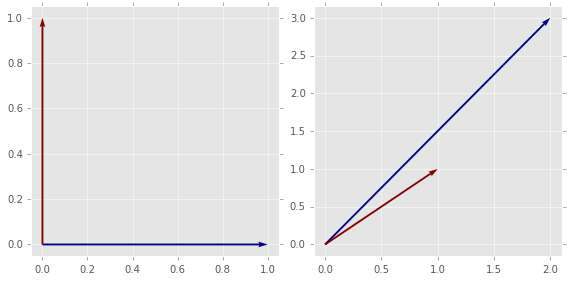

In [18]:
# Mostramos  un grafico de Ae_1  y Ae_2

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
g_vector([e1, e2])
plt.subplot(1,2,2)
g_vector([A.dot(e1), A.dot(e2)])
plt.tight_layout()

## Normas matriciales

 Podemos extender la norma de un vector a una norma matricial. Las normas de matrices son usadas para determinar la condición de una matriz. Hay muchas normas matriciales, pero las más comunes son llamadas `p-normas`. Así por ejemplo para un vector $n$ dimensional y para $1 \leq p < \infty$, tenemos 
 
 $$\Vert v \Vert_p = \left(\sum\limits_{i=1}^n \vert v_i \vert ^p\right)^{\frac{1}{p}}$$
 
 y para el caso en que $p = \infty$
 
 $$\Vert v \Vert_\infty = \max{\vert v_i\vert}$$
 
 De forma similar para el caso de las matrices
 
 $$ \Vert A\Vert_p = \sup_x \frac{\Vert Ax\Vert_p}{\Vert x \Vert_p}$$
 
 
 $$\Vert A \Vert_{1} = \max_j\left(\sum\limits_{i=1}^n\vert a_{ij} \vert \right)$$ 
 
 que es una suma de columnas.
 
 $$ \Vert A \Vert _{\infty} = \max_i\left(\sum\limits_{j=1}^n\vert a_{ij}\vert \right)$$
 
 que es una suma de filas.
 
 
 La norma $\Vert A \Vert_2$ es dado por el mayor autovalor de $(A^TA)^{\frac{1}{2}}$, en otras palabras es el mayor `valor singular` de $A$.
 
 Otra norma usada es la conocida como la norma Frobenius, que se puede calcular de la siguiente forma
 
 $$\Vert A \Vert_F = \left(\sum\sum \left(a_{ij}\right)^2\right)^{\frac{1}{2}} $$
 

## Otras matrices

Las matrices cuadradas tienen el mismo número de columnas. Si una matriz cuadrada $n \times n$ es invertible (el rango de $A$ es n)  esta es única. Esta situación conduce a una solución única en un sistema lineal.

Una matriz diagonal es una matriz cuyas entradas fuera de la diagonal son ceros. En este caso también se pueden considerar matrices rectangulares de orden $m \times n$ ser diagonales si todas las entradas $a_{ij}$ son cero para $i \neq j$.

Una matriz $A$ es (skew)simétrica si: $a_{ij} = (-)a_{ji}$ o de forma equivalente $A = (-)A^{T}$.

Una matriz $A$ es triangular (superior)(inferior) si $a_{ij} = 0$ para todo $(i >j)(i < j)$.

Esas matrices tienen muchos ceros en sus entradas. Matrices bandas tienen `bandas` de elementos distintos de ceros y se puden utilizar para simplicar cálculos. 

Las matrices sparse, son aquellas que tienen pocos elementos distintos de cero.

Una matriz $A$ es ortogonal si $AA^{T} = I$, en otras palabras $A^{T} = A^{-1}$.

* Las filas y columnas de una matriz ortogonal son un conjunto ortonormal de vectores.
* Las transformaciones ortogonales preservan longitud y ángulos entre vectores.

Una matriz cuadrada es definida positiva si $u^{T}Au > 0$ para un vector $n$-dimensional distinto de cero.

Una matriz definida positiva, simétrica $A$ es una matriz definida positiva tal que $A = A^{T}$.

* Una matriz simétrica, definida positiva es diagonalizable.
* La matriz covarianza es simétrica y definida positiva.
* Las matrices simétricas, definidas positivas  tienen raíz cuadrada.

# Descomposiciones matriciales

La descomposiciones de matrices es un importante paso para resolver sistema de ecuaciones de manera eficiente computacionalmente.

## Descomposición LU y Eliminación Gaussiana



La eliminación Gaussiana, es esencialmente la descomposición $LU$, veamos como trabaja:


Consideremos un sistema de ecuaciones $3\times 3$, en general este procedimiento funciona para sistemas $n \times n$:


$$\begin{split}\left(\begin{matrix}a_{11}&a_{12} & a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\\x_3\end{matrix}\right) = \left(\begin{matrix}b_1\\b_2\\b_3\end{matrix}\right)\end{split}$$


Si la matriz $A$ es no singular, resolvamos el sistema usando la  `eliminación Gaussiana`, empezando por escribir la matriz aumentada del sistema


$$\begin{split}\left(\begin{array}{ccc|c}a_{11}&a_{12} & a_{13}& b_1 \\a_{21}&a_{22}&a_{23}&b_2\\a_{31}&a_{32}&a_{33}&b_3\end{array}\right)\end{split}$$


Si la primera entrada $a_{11}$ es diferente de cero, entonces dividimos la primera fila por $a_{11}$ y substraemos el múltiplo apropiado de la primera fila desde las otras filas, de manera que `0` sea el primer valor de todas las filas. Si $a_{11}$ es cero, debemos permutar las filas). El resultado es como sigue

$$\begin{split}\left(\begin{array}{ccc|c}
1 & \frac{a_{12}}{a_{11}} & \frac{a_{13}}{a_{11}} & \frac{b_1}{a_{11}} \\
0 & a_{22} - a_{21}\frac{a_{12}}{a_{11}} & a_{23} - a_{21}\frac{a_{13}}{a_{11}}  & b_2 - a_{21}\frac{b_1}{a_{11}}\\
0&a_{32}-a_{31}\frac{a_{12}}{a_{11}} & a_{33} - a_{31}\frac{a_{13}}{a_{11}}  &b_3- a_{31}\frac{b_1}{a_{11}}\end{array}\right)\end{split}$$


Repetimos el procedimiento para la segunda fila, primero dividiendo  por la entrada distinta de cero, a continuación, restando el múltiplo apropiado de la fila con cada una de las filas tercera y primera, de modo que la segunda entrada en la fila $1$ y $3$ sean $0$. Se debe  continuar hasta que la matriz de la izquierda sea la identidad. El vector $x$ solución del sistema  es el vector columna resultante de la derecha. 


Por lo general, es más eficiente  parar en forma de un `nivel de fila reducida` (triangular superior, con unos en la diagonal), y luego usar otra forma de sustitución (`back sustitution`) para obtener la respuesta final. Ten en cuenta que en algunos casos, es necesario permutar filas para obtener un nivel de fila reducida (` pivoteo parcial`). Si también manipulamos columnas, tenemos un  `pivoteo completo`.

Con la eliminación Gaussiana se puede obtener  la inversa de una matriz, mediante la reducción de la matriz $A$ a la identidad, con la matriz de identidad en  la porción aumentada.

Ahora, todo esto está bien cuando estamos resolviendo un sistema  una  vez, para un resultado $b$. Muchas aplicaciones implican soluciones a múltiples problemas, donde el  lado izquierdo de la ecuación  no cambia, pero hay muchos vectores  resultados $b$.

En este caso, es más eficiente para descomponer $A$.


La descomposición $LU$ de una matriz $A$  es una descomposición tal que 

$$A = LU$$

donde $L$ es una matriz triangular inferior y $U$ es una matriz triangular superior.


**Ejemplo** 

Consideramos una matriz 

$$\begin{split}A = \left(\begin{matrix} 1 & 3 & 4 \\
  2& 1& 3\\
  4&1&2\end{matrix}\right)\end{split}$$


Necesitamos multiplicar la fila $1$ por 2 y restar a la fila $2$ para eliminar la primera entrada en la fila $2$, y luego multiplicar la fila $1$ por 4 y restar de la fila $3$. En lugar de escribir ceros  en las primeras entradas de las filas $2$ y $3$, se registrar los múltiplos necesarios para su eliminación:


$$\begin{split}\left(\begin{matrix} 1 & 3 & 4 \\
  (2)& -5 & -5\\
   (4)&-11&-14
  \end{matrix}\right)\end{split}$$
  
  
y entonces eliminamos la segunda entrada en la tercera fila:

$$\begin{split}\left(\begin{matrix} 1 & 3 & 4 \\
 (2)& -5 & -5\\
  (4)&(\frac{-11}{5})&-3
   \end{matrix}\right)\end{split}$$
   
Ahora tenemos la descomposición:


$$\begin{split}L= \left(\begin{matrix} 1 & 0 & 0 \\
   2& 1 & 0\\
   4&\frac{-11}5&1
   \end{matrix}\right)
   U = \left(\begin{matrix} 1 & 3 & 4 \\
   0& -5 & -5\\
   0&0&-3
   \end{matrix}\right)\end{split}$$
   
   
 Podemos resolver el sistema, con dos substituciones:
 
 $$Ly = b$$
 
 
 $$Ux = y$$
 
Con `numpy` se puede realizar de la siguiente manera:

In [19]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])
print(A)

P, L, U = la.lu(A)
print(np.dot(P.T, A))
print
print(np.dot(L, U))
print(P)
print(L)
print(U)

[[1 3 4]
 [2 1 3]
 [4 1 2]]
[[ 4.  1.  2.]
 [ 1.  3.  4.]
 [ 2.  1.  3.]]
[[ 4.  1.  2.]
 [ 1.  3.  4.]
 [ 2.  1.  3.]]
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]
[[ 1.          0.          0.        ]
 [ 0.25        1.          0.        ]
 [ 0.5         0.18181818  1.        ]]
[[ 4.          1.          2.        ]
 [ 0.          2.75        3.5       ]
 [ 0.          0.          1.36363636]]


`Numpy` utiliza pivoteo parcial en las descomposiciones (las filas de la matriz son permutadas para  utilizar el  mayor pivote). Esto se debe a que  pequeños pivotes pueden conducir a  inestabilidad numérica. 

## Descomposición de Cholesky

Sea $A$ una matriz simétrica, definida positiva. Hay una única descomposición tal que 

$$A = LL^{T}$$

donde $L$ es una matriz triangular con elementos en la diagonal positivos y $L^{T}$ es su transpuesta. 


* Sea $A$ una matriz $n \times n$. Encontramos la matriz $L$ usando el siguiente procedimiento iterativo

$$\begin{split}A = \left(\begin{matrix}a_{11}&A_{12}\\A_{12}&A_{22}\end{matrix}\right) =
\left(\begin{matrix}\ell_{11}&0\\
L_{12}&L_{22}\end{matrix}\right)
\left(\begin{matrix}\ell_{11}&L_{12}\\0&L_{22}\end{matrix}\right)\end{split}$$

* Sea $\ell_{11} = \sqrt{a_{11}}$.
* $L_{12} = \frac{1}{\ell_{11}}A_{12}$.
* Resolvemos $A_{22} - L_{12}L_{12}^T = L_{22}L_{22}^T$ para $L_{22}$.

**Ejemplo**

$$\begin{split}A = \left(\begin{matrix}1&3&5\\3&13&23\\5&23&42\end{matrix}\right)\end{split}$$

$$\ell_{11} = \sqrt{a_{11}} = 1$$

$$L_{12} = \frac{1}{\ell_{11}} A_{12} = A_{12}$$

Y así se concluye con $\ell_{33}=1$


Esto produce la descomposición:

$$\begin{split}\left(\begin{matrix}1&3&5\\3&13&23\\5&23&42\end{matrix}\right) =
\left(\begin{matrix}1&0&0\\3&2&0\\5&4&1\end{matrix}\right)\left(\begin{matrix}1&3&5\\0&2&4\\0&0&1\end{matrix}\right)\end{split}$$


Usando `numpy` tenemos lo siguiente:

In [20]:
A = np.array([[1,3,5],[3,13,23],[5,23,42]])
L = la.cholesky(A)
print(np.dot(L.T, L))

print(L)
print(A)

[[  1.   3.   5.]
 [  3.  13.  23.]
 [  5.  23.  42.]]
[[ 1.  3.  5.]
 [ 0.  2.  4.]
 [ 0.  0.  1.]]
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]


## Descomposición matricial para PCA y mínimos cuadrados

 Un autovector de una matriz $A$ es un vector distinto cero $v$ tal que
 
 $$Av = \lambda v$$
 
 para un escalar $\lambda$. Un valor $\lambda$ es llamado un autovalor de $A$.
 
 Si una matriz $A$ de orden $n\times n$ tienen $n$ autovectores independientes, entonces $A$ puede ser descompuesto de la siguiente manera:
 
 $$A = B \Lambda B^{-1}$$
 
 
 donde $\Lambda$ es una matriz diagonal cuyas elementos en las diagonales son los autovalores  de $A$ y las columnas de $B$ son los autovectores de $A$.
 
 * Una matriz $A$ de orden $n \times n \iff $ tiene $n$ autovectores linealmente.
 * Una matriz definida positiva, simétrica tiene sólo autovalores positivos y su descomposición:
 
 $$A=B\Lambda B^{-1}$$
 
 es vía una transformación ortogonal $B$, es decir sus autovectores con conjuntos ortonormales.

## Autovalores

Si $v$ es un autovector de una matriz $A$ es de orden $n \times n$ con un autovalor $\lambda$, entonces

$$Av - \lambda I = 0$$

donde $I$ es la matriz identidad de dimensión $n$ y $0$ es el vector cero n-dimensional. Por tanto los autovalores de $A$ satisfacen:

$$\det(A - \lambda I) = 0$$

El lado izquierdo de la ecuación es un polinomio en $\lambda$ y es llamado polinomio característico de $A$. Así para encontrar un autovalor de $A$, debemos encontrar las raices del polinomio característico.


Computacionalmente, el cálculo de polinomio caractístico y resolver las raices se hace a través de cálculo numérico.

In [21]:
# Ejemplo

A = np.array([[0,1,1],[2,1,0],[1,1,1]])

u, V = la.eig(A)
print(np.dot(V,np.dot(np.diag(u), la.inv(V))))
print(u)


[[ 0.+0.j  1.+0.j  1.+0.j]
 [ 2.+0.j  1.+0.j -0.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j]]
[ 2.61803399+0.j -1.00000000+0.j  0.38196601+0.j]


In [23]:
# Si $A$ es definida positva (matriz convarianza)
# usamos real_if_close 

A = np.array([[0,1,1],[2,1,0],[3,4,5]])
u, V = la.eig(A)
print(u)
print (np.real_if_close(u))

[ 5.85410197+0.j -0.85410197+0.j  1.00000000+0.j]
[ 5.85410197 -0.85410197  1.        ]


## Valores singulares

Para una matriz $A$ de orden $m \times n$, definimos sus `valores singulares` como  las raices cuadradas de los autovalores de $A^TA$. Esos valores son siempre bien definidos ya que $A^TA$ es siempre simétrica, definida positiva, de manera que sus autovalores son reales y positivos.

Los valores singulares tienen importantes propiedades de la matriz. Geométricamente una matriz $A$ lleva la esfera unitaria $R^n$ a un elipse. Los valores singulares son la longitud de los semiejes.  

![Representación geométrica de los valores singulares](svd.png)


Los valores singulares proporcionan una medida de la `estabilidad de una matriz`.

## Descomposición QR

QR es un método de descomposición para escribir una matriz $A$ como el producto de dos matrices:

$$A = QR$$

donde $Q$ es una matriz ortogonal de orden $m \times n$ y $R$ es una matriz triangular de orden $n \times n$. Las primeras $k$ columnas de $Q$ son una base ortonormal para el espacio columna de las primeras $k$ columnas de $A$.

La descomposición QR iterativa es a menudo usada en el cálculo de los autovalores.

In [29]:
# Ejemplo

import pprint  # modulo de mejor presentacion de las estructuras de python

A = scipy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]]) 
Q, R = la.qr(A)

print ("A:")
pprint.pprint(A)

print ("Q:")
pprint.pprint(Q)

print ("R:")
pprint.pprint(R)

A:
array([[ 12, -51,   4],
       [  6, 167, -68],
       [ -4,  24, -41]])
Q:
array([[-0.85714286,  0.39428571,  0.33142857],
       [-0.42857143, -0.90285714, -0.03428571],
       [ 0.28571429, -0.17142857,  0.94285714]])
R:
array([[ -14.,  -21.,   14.],
       [   0., -175.,   70.],
       [   0.,    0.,  -35.]])


## Descomposición en valores singulares

Una importante descomposición de una matriz, es la `Descomposición en valores singulares ` o `SVD`. Para alguna matriz $A$ de orden $m \times n$, podemos escribir

$$A = UDV^T$$

donde $U$ es una matriz unitaria (ortogonal en el caso real) de orden $m \times m$, D es una matriz diagonal de orden $m \times n$, con elementos en la diagonal $d_1, \dots d_m$ no negativos y $V$ una matriz unitaria (ortogonal en el caso real) de orden $n \times n$.



In [30]:
# Ejemplo (Jeremy kun)

from numpy.linalg import svd
import pprint
 
MR = [
    [2, 5, 3],
    [1, 2, 1],
    [4, 1, 1],
    [3, 5, 2],
    [5, 3, 1],
    [4, 5, 5],
    [2, 4, 2],
    [2, 2, 5],
]

U, valores_singulares, V = svd(MR)


print ("U:")
pprint.pprint(U)

print ("Valores singulares:")
pprint.pprint(valores_singulares)

print ("V:")
pprint.pprint(V)

U:
array([[-0.39458526,  0.23923575, -0.35445911, -0.38062172, -0.29836818,
        -0.49464816, -0.30703202, -0.29763321],
       [-0.15830232,  0.03054913, -0.15299759, -0.45334816,  0.31122898,
         0.23892035, -0.37313346,  0.67223457],
       [-0.22155201, -0.52086121,  0.39334917, -0.14974792, -0.65963979,
         0.00488292, -0.00783684,  0.25934607],
       [-0.39692635, -0.08649009, -0.41052882,  0.74387448, -0.10629499,
         0.01372565, -0.17959298,  0.26333462],
       [-0.34630257, -0.64128825,  0.07382859, -0.04494155,  0.58000668,
        -0.25806239,  0.00211823, -0.24154726],
       [-0.53347449,  0.19168874,  0.19949342, -0.03942604,  0.00424495,
         0.68715732, -0.06957561, -0.40033035],
       [-0.31660464,  0.06109826, -0.30599517, -0.19611823, -0.01334272,
         0.01446975,  0.85185852,  0.19463493],
       [-0.32840223,  0.45970413,  0.62354764,  0.1783041 ,  0.17631186,
        -0.39879476,  0.06065902,  0.25771578]])
Valores singulares:
array([ 

Estos resultados, son un poco extraños., ya que las matrices $U$ y $V$ son de forma incorrecta, debido a que la matriz de entrada tiene rango $3$. Mejoremos un poco, esta situación, reconstuyendo la forma de la matriz inicial.

In [31]:
S = np.vstack([
    np.diag(valores_singulares),
    np.zeros((5, 3)),
])
 
print(np.round(MR - np.dot(U, np.dot(S, V)), decimals=10))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]
 [ 0.  0.  0.]
 [ 0. -0. -0.]
 [ 0.  0. -0.]]


In [35]:
# Repetimos  el procedimiento anterior

U, valores_singulares, V = svd(MR, full_matrices=False)


print ("U:")
pprint.pprint(U)

print ("Valores singulares:")
pprint.pprint(valores_singulares)

print ("V:")
pprint.pprint(V)

S = np.diag(valores_singulares)

print("Diferencia: ")
pprint.pprint(np.round(MR - np.dot(U, np.dot(S, V)), decimals=10))

U:
array([[-0.39458526,  0.23923575, -0.35445911],
       [-0.15830232,  0.03054913, -0.15299759],
       [-0.22155201, -0.52086121,  0.39334917],
       [-0.39692635, -0.08649009, -0.41052882],
       [-0.34630257, -0.64128825,  0.07382859],
       [-0.53347449,  0.19168874,  0.19949342],
       [-0.31660464,  0.06109826, -0.30599517],
       [-0.32840223,  0.45970413,  0.62354764]])
Valores singulares:
array([ 15.09626916,   4.30056855,   3.40701739])
V:
array([[-0.54184808, -0.67070995, -0.50650649],
       [-0.75152295,  0.11680911,  0.64928336],
       [ 0.37631623, -0.73246419,  0.56734672]])
Diferencia: 
array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., -0.,  0.],
       [ 0., -0., -0.],
       [ 0.,  0.,  0.],
       [ 0., -0., -0.],
       [ 0., -0., -0.]])


Esto hace que la reconstrucción mucho mejor , ya que sólo podemos multiplicar todo sin tener que añadir más filas de ceros a $D$.



### Número de condición

Una de las aplicaciones del SVD es lo que se conoce como **número de condición**:

Para una matriz cuadrada no singular, el número de condición que se define como

$$cond (A) = \Vert A\Vert\Vert A^{-1}\Vert$$ y se puede expresar usando valores singulares.

Para eso si $A =UDV^T$, entonces $A^{-1}= VD^{-1}U^T$. Por lo tanto los valores singulares de $A^{-1}$ s son $\frac{1}{\lambda_1}, \dots, \frac{1}{\lambda_n}$ y 


$$\frac{1}{\lambda_n} \geq \dots \geq \frac{1}{\lambda_1}$$.

De aquí se obtiene que $\Vert A^{-1} \Vert = \frac{1}{\lambda_n}$, de manera que 

$$cond (A) = \Vert A\Vert\Vert A^{-1}\Vert = \lambda_1/\lambda_n$$.



In [37]:
import pprint 

U, s, V = np.linalg.svd(A)

print ("Valores singulares:")
pprint.pprint(s)

print ("Numero de condicion:")
pprint.pprint(max(s)/min(s))

Valores singulares:
array([ 190.56724372,   32.85688323,   13.69492038])
Numero de condicion:
13.915177188954052


Una de las principales aplicaciones a machine learning es el siguiente teorema:

**Teorema SVD** 

`Cálcular el mejor subespacio k-dimensional se reduce a k aplicaciones del problema unidimensional`.